## Kural Tabanlı Sınıflandırma

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### persona.csv dosyasını okutunuz ve veri seti ile ilgili genel bilgileri gösteriniz.

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 100)
df = pd.read_csv('persona.csv')
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


#### Kaç unique SOURCE vardır? Frekansları nedir?

2


<Axes: xlabel='count', ylabel='SOURCE'>

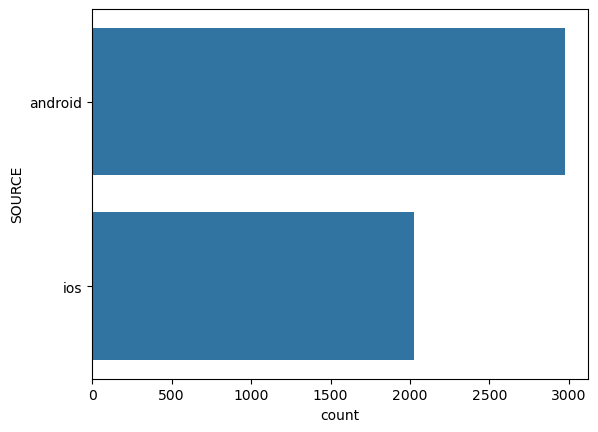

In [7]:
print(df['SOURCE'].nunique())
sns.countplot(df['SOURCE'])

#### Kaç unique PRICE vardır?

In [9]:
df['PRICE'].nunique()

6

#### Hangi PRICE'dan kaçar tane satış gerçekleşmiş?

In [11]:
df['PRICE'].value_counts()

PRICE
29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: count, dtype: int64

#### Hangi ülkeden kaçar tane satış olmuş?

In [13]:
df['COUNTRY'].value_counts()

COUNTRY
usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: count, dtype: int64

#### Ülkelere göre satışlardan toplam ne kadar kazanılmış?

In [15]:
df[['PRICE','COUNTRY']].groupby("COUNTRY").sum()

,PRICE
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


#### SOURCE türlerine göre satış sayıları nedir?

In [17]:
df['SOURCE'].value_counts()

SOURCE
android    2974
ios        2026
Name: count, dtype: int64

#### Ülkelere göre PRICE ortalamaları nedir?

In [19]:
df[['COUNTRY','PRICE']].groupby("COUNTRY").mean()

,PRICE
COUNTRY,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


#### SOURCE'lara göre PRICE ortalamaları nedir?

In [21]:
df[['SOURCE','PRICE']].groupby("SOURCE").mean()

,PRICE
SOURCE,
android,34.174849
ios,34.069102


#### COUNTRY-SOURCE kırılımında PRICE ortalamaları nedir?

In [23]:
df.groupby(['SOURCE','COUNTRY']).agg({"PRICE" : "mean"})

PRICE
SOURCE  COUNTRY           
android bra      34.387029
        can      33.330709
        deu      33.869888
        fra      34.312500
        tur      36.229437
        usa      33.760357
ios     bra      34.222222
        can      33.951456
        deu      34.268817
        fra      32.776224
        tur      33.272727
        usa      34.371703

#### COUNTRY, SOURCE, SEX, AGE kırılımında ortalama kazançlar nedir?

In [25]:
df.groupby(['COUNTRY', 'SOURCE', 'SEX', 'AGE']).agg({"PRICE" : "mean"})

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

#### Çıktıyı PRICE’a göre sıralayınız.

In [70]:
agg_df = df.groupby(['COUNTRY', 'SOURCE', 'SEX', 'AGE']).agg({"PRICE" : "mean"}).sort_values(by="PRICE", ascending=False)
agg_df

PRICE
COUNTRY SOURCE  SEX    AGE       
bra     android male   46    59.0
usa     android male   36    59.0
fra     android female 24    59.0
usa     ios     male   32    54.0
deu     android female 36    49.0
...                           ...
usa     ios     female 38    19.0
                       30    19.0
can     android female 27    19.0
fra     android male   18    19.0
deu     android male   26     9.0

[348 rows x 1 columns]

#### Indekste yer alan isimleri değişken ismine çeviriniz.

In [72]:
agg_df = agg_df.reset_index()
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0
...,...,...,...,...,...
343,usa,ios,female,38,19.0
344,usa,ios,female,30,19.0
345,can,android,female,27,19.0
346,fra,android,male,18,19.0


#### Age değişkenini kategorik değişkene çeviriniz ve agg_df’e ekleyiniz.

In [82]:
agg_df['AGE_CUT'] = pd.cut(agg_df['AGE'], bins=[0, 18, 23, 30, 40, 70], labels=['0_18', '19_23', '24_30', '31_40', '41_70'], right=False)
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CUT
0,bra,android,male,46,59.0,41_70
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40
...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,31_40
344,usa,ios,female,30,19.0,31_40
345,can,android,female,27,19.0,24_30
346,fra,android,male,18,19.0,19_23


#### Yeni seviye tabanlı müşterileri (persona) tanımlayınız.

In [121]:
agg_df['customers_level_based'] = ""

for i in range(len(agg_df)):
    agg_df.loc[i, 'customers_level_based'] = (
        str(agg_df['COUNTRY'].iloc[i]).upper() + "_" +
        str(agg_df['SOURCE'].iloc[i]).upper() + "_" +
        str(agg_df['SEX'].iloc[i]).upper() + "_" +
        str(agg_df['AGE_CUT'].iloc[i]).upper()
    )


agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CUT,customers_level_based
0,bra,android,male,46,59.0,41_70,BRA_ANDROID_MALE_41_70
1,usa,android,male,36,59.0,31_40,USA_ANDROID_MALE_31_40
2,fra,android,female,24,59.0,24_30,FRA_ANDROID_FEMALE_24_30
3,usa,ios,male,32,54.0,31_40,USA_IOS_MALE_31_40
4,deu,android,female,36,49.0,31_40,DEU_ANDROID_FEMALE_31_40
...,...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,31_40,USA_IOS_FEMALE_31_40
344,usa,ios,female,30,19.0,31_40,USA_IOS_FEMALE_31_40
345,can,android,female,27,19.0,24_30,CAN_ANDROID_FEMALE_24_30
346,fra,android,male,18,19.0,19_23,FRA_ANDROID_MALE_19_23


agg_df['customers_level_based'] = agg_df['AGE']

for i in range(len(agg_df)):
    agg_df['customers_level_based'][i] = str(agg_df['COUNTRY'][i]).upper() + "_" + str(agg_df['SOURCE'][i]).upper() + "_" + str(agg_df['SEX'][i]).upper() + "_" + str(agg_df['AGE_CUT'][i]).upper()

agg_df

In [125]:
agg_df = agg_df.groupby('customers_level_based')['PRICE'].mean().reset_index()

agg_df

,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,36.775132
1,BRA_ANDROID_FEMALE_19_23,34.140268
2,BRA_ANDROID_FEMALE_24_30,31.903161
3,BRA_ANDROID_FEMALE_31_40,36.436661
4,BRA_ANDROID_FEMALE_41_70,36.737179
...,...,...
107,USA_IOS_MALE_0_18,33.785686
108,USA_IOS_MALE_19_23,34.820635
109,USA_IOS_MALE_24_30,33.460317
110,USA_IOS_MALE_31_40,37.126482


#### Yeni müşterileri (personaları) segmentlere ayırınız.

In [128]:
agg_df['Segment'] = pd.cut(agg_df['PRICE'], 4, labels=["D", "C", "B", "A"])
agg_df

,customers_level_based,PRICE,Segment
0,BRA_ANDROID_FEMALE_0_18,36.775132,B
1,BRA_ANDROID_FEMALE_19_23,34.140268,B
2,BRA_ANDROID_FEMALE_24_30,31.903161,C
3,BRA_ANDROID_FEMALE_31_40,36.436661,B
4,BRA_ANDROID_FEMALE_41_70,36.737179,B
...,...,...,...
107,USA_IOS_MALE_0_18,33.785686,C
108,USA_IOS_MALE_19_23,34.820635,B
109,USA_IOS_MALE_24_30,33.460317,C
110,USA_IOS_MALE_31_40,37.126482,B


#### Yeni gelen müşterileri sınıflandırıp, ne kadar gelir getirebileceklerini tahmin ediniz.

33 yaşında ANDROID kullanan bir Türk kadını hangi segmente aittir ve ortalama ne kadar gelir kazandırması beklenir?

35 yaşında IOS kullanan bir Fransız kadını hangi segmente aittir ve ortalama ne kadar gelir kazandırması beklenir?

In [131]:
new_user = "TUR_ANDROID_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,PRICE,Segment
75,TUR_ANDROID_FEMALE_31_40,41.833333,A


In [133]:
new_user_2 = "FRA_IOS_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user_2]

,customers_level_based,PRICE,Segment
65,FRA_IOS_FEMALE_31_40,32.636364,C
